In [1]:
# import all necessary packages and functions.
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def days(day):
    weekdays = {"0":"Monday", "1":"Tuesday", "2": "Wednesday", "3":"Thursday", "4":"Friday", "5":"Saturday", "6":"Sunday"}
    return (weekdays[day])

In [3]:
weekday = ["Monday", "Tuesday",  "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_trip_201402 = pd.read_csv('201402_trip_data.csv', names=('TripID','Duration','Start_Date','Start_Station','Start_Terminal','End_Date','End_Station','End_Terminal','Bike','Subscription_Type','Zip_Code'), header = 0)
df_trip_201402['Start_Date'] = pd.to_datetime(df_trip_201402['Start_Date'])

In [4]:
# Extract the date
df_trip_201402["only_date"] = [d.date() for d in df_trip_201402["Start_Date"]]

# Added a new column weekdays
df_trip_201402["weekdays"] = [days(str(d.weekday())) for d in df_trip_201402["only_date"]]

In [5]:
def manipualte_list(a):
    c = a[-1]
    a.insert(0,c)
    del a[-1]
    return a

In [6]:
sub = 0
cust = 0
su,cu,total = {},{},{}
su_l, cu_l, total_l = [],[],[]

for i in weekday:
    subsc = df_trip_201402[df_trip_201402['weekdays'].str.contains(i)]
    sub,cust = 0,0
    for j in range(len(subsc.index)):
        if (subsc.iloc[j]['Subscription_Type'] == "Subscriber"):
            sub += 1
        else:
            cust +=1
    su[i] = sub
    su_l.append(sub)
    cu[i] = cust
    cu_l.append(cust)
    total[i] = (sub + cust)
    total_l.append(sub + cust)
    
su_l = manipualte_list(su_l)
cu_l = manipualte_list(cu_l)
total_l = manipualte_list(total_l)
print("Number of Subscribers")
print(su)
print(su_l)
print("Number of Costumers")
print(cu)
print(cu_l)
print("Total number of riders")
print(total)
print(total_l)

Number of Subscribers
{'Wednesday': 20248, 'Tuesday': 21461, 'Saturday': 6073, 'Monday': 19705, 'Sunday': 5003, 'Friday': 19763, 'Thursday': 21394}
[5003, 19705, 21461, 20248, 21394, 19763, 6073]
Number of Costumers
{'Wednesday': 3403, 'Tuesday': 3217, 'Saturday': 6340, 'Monday': 3433, 'Sunday': 5584, 'Friday': 4520, 'Thursday': 3871}
[5584, 3433, 3217, 3403, 3871, 4520, 6340]
Total number of riders
{'Wednesday': 23651, 'Tuesday': 24678, 'Saturday': 12413, 'Monday': 23138, 'Sunday': 10587, 'Friday': 24283, 'Thursday': 25265}
[10587, 23138, 24678, 23651, 25265, 24283, 12413]


[0 1 2 3 4 5 6]


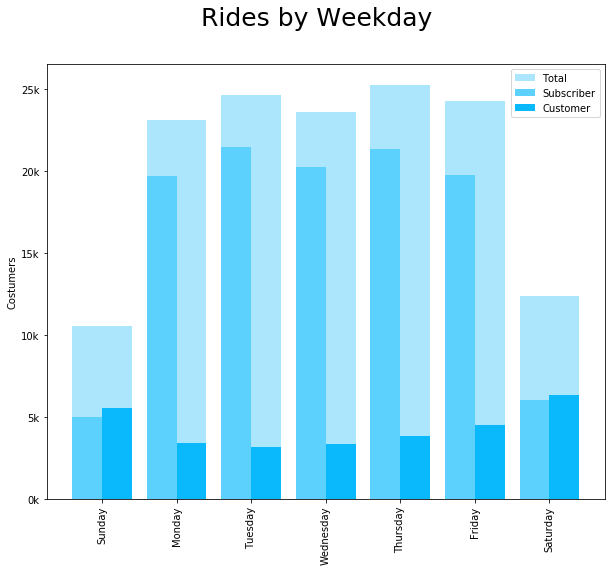

In [16]:
weekday = ["Sunday","Monday", "Tuesday",  "Wednesday", "Thursday", "Friday", "Saturday"]
x_plot = np.arange(len(weekday))
bar_width = 0.4
print(x_plot)
plt.figure(figsize=(10,8))
patch1 = plt.bar(x_plot+1, total_l, (bar_width*2), color="#ACE6FD", label="total")
patch2 = plt.bar(x_plot+0.8, su_l, bar_width, label='Subscriber', color="#5CD1FE")
patch3 = plt.bar(x_plot+1.2, cu_l, bar_width, color="#0AB9FB")
plt.suptitle("Rides by Weekday", fontsize = 25)
plt.ylabel('Costumers')
plt.xticks(x_plot+1, weekday, rotation='vertical')
plt.yticks([0,5000,10000,15000,20000,25000],['0k','5k', '10k','15k','20k', '25k'])
plt.legend((patch1,patch2,patch3),('Total','Subscriber','Customer'))
plt.show()